In [47]:
#1 
import pandas as pd
import numpy as np
pd.__version__

'0.25.2'

In [48]:
# 2.从列表创建 Series
list = ['1','2','3','4','5']
list_df = pd.Series(list)   # 如果不指定索引，默认从0开始
list_df

0    1
1    2
2    3
3    4
4    5
dtype: object

In [49]:
# 3.从字典创建 Series
dict = {
    'name':'sakura',
    'age':23,
    'male':'man'
}
dict_df = pd.Series(dict)
dict_df

name    sakura
age         23
male       man
dtype: object

In [50]:
# 4.从 NumPy 数组创建 DataFrame 注意区分dataframe和series
dates = pd.date_range('today',periods=6)  # 定义时间序列作为 index
num_arr = np.random.randn(6,4)
columns = ['A','B','C','D']
df1 = pd.DataFrame(num_arr,index=dates,columns=columns)
# 在看下上面dates    datetime64[ns]
print(dates.dtype)
df1  
# dataframe 可以设置数据块（numpy)，index索引设置，columns列名栏设置


datetime64[ns]


,A,B,C,D
2019-11-29 10:16:32.763667,1.744369,-0.577242,-0.874214,0.301535
2019-11-30 10:16:32.763667,-0.540831,-0.451639,1.293658,-0.267922
2019-12-01 10:16:32.763667,1.140687,-0.036373,0.563372,-0.568641
2019-12-02 10:16:32.763667,-0.942968,-0.384615,-0.340878,-1.561292
2019-12-03 10:16:32.763667,0.724985,-1.290984,-0.052910,0.649082
2019-12-04 10:16:32.763667,-0.472747,0.289845,0.853765,-0.929662


In [51]:
 # 5.从CSV中创建 DataFrame，分隔符为;，编码格式为gbk
# df = pd.read_csv('test.csv',encoding = 'gbk',sep=',')

# 6.从字典对象data创建DataFrame，设置索引为labels
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [52]:
# 7.显示DataFrame的基础信息，包括行的数量；列名；每一列值的数量、类型
df.info()
# 方法二
# df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [53]:
df.describe()


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [54]:
# 8.展示df的前3行
df.head(3)
# df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [55]:
# 9.取出df的animal和age列
df[['animal','age']]
# 或者
df.loc[:,['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [56]:
# 10.取出索引为[3, 4, 8]行的animal和age列
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [57]:
# 11.取出age值大于3的行
df.loc[df['age']>3]
# or
df[df['age']>3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


In [58]:
# 12.取出age值缺失的行
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [59]:
# 13.取出age在2,4间的行（不含）
df[(df['age']>2) & (df['age']<4)]  # 注意里面要打括号

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


In [60]:
# 14.f行的age改为1.5
df.loc['f','age']=1.5



In [61]:
# 15.计算visits的总和
df['visits'].sum()

19

In [62]:
# 16.计算每个不同种类animal的age的平均数
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [63]:
# 17.在df中插入新行k，然后删除该行
df.loc['k']=[5.5,'dog','no',2]
# df['k'] = [5.5,'dog','no',2] 是错的
df
# def df['k']  这个表达也是错的
df = df.drop('k')  # it's true
# df = df.drop(df['k'])  it's false
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,3,1,no


In [64]:
# 18.计算df中每个种类animal的数量
# a = df.groupby('animal').value_counts()  
a = df.groupby('animal')
type(a)  #这是错误表达，pandas.core.groupby.generic.DataFrameGroupBy 没有value_counts()
df['animal'].value_counts()


dog      4
cat      4
snake    2
Name: animal, dtype: int64

In [65]:
# 19.先按age降序排列，后按visits升序排列
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7,2,no
e,dog,5,2,no
g,snake,4.5,1,no
j,dog,3,1,no
b,cat,3,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [66]:
# 20.将priority列中的yes, no替换为布尔值True, False
df['priority'] = df['priority'].map({'yes':True,'no':False})
# 所有的东西都进行替换，用的是map，参数是字典形式
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


In [67]:
# 21.将animal列中的snake替换为python
# 并不是完全替换，就用replace
df['animal'].replace('snake','python')# 这样的表达是无用的
df['animal']= df['animal'].replace('snake','python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


In [83]:
# 22.对每种animal的每种不同数量visits，计算平均age，
# 即，返回一个表格，行是aniaml种类，列是visits数量，
# 表格值是行动物种类列访客数量的平均年龄
# df.groupby('animal')['visits'].mean()  这个适用于只对animal这一个类别进行分类
# 题目中其实是对animal进行分类，然后再根据visits分类，最后计算的还是age平均值
# df.groupby(as_index='animal',as_columns='visits')['age'].mean() 错误表达
# df.pivot_table(index='animal',columns='visits',values='age',aggfunc='mean')
# df['age']=df['age'].replace('NaN',2)
# df
pd.pivot_table(df,index=[u'animal'],columns=[u'visits'],values=[u'age'],aggfunc=[np.mean])
# 仔细比较上下两种表达，上面不对


mean           
        age           
visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN

In [84]:
# 23.有一列整数列A的DatraFrame，删除数值重复的行
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)
df1 = df.loc[df['A'].shift() != df['A']]
# 方法二
# df1 = df.drop_duplicates(subset='A')
print(df1)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


In [86]:
# 24.一个全数值DatraFrame，每个数字减去该行的平均数
df = pd.DataFrame(np.random.random(size=(5,3)))
print(df)
df1 = df.sub(df.mean(axis=1),axis=0)
print(df1)


          0         1         2
0  0.666146  0.760501  0.920277
1  0.482521  0.713067  0.437817
2  0.790659  0.218353  0.884467
3  0.560314  0.456009  0.012765
4  0.127378  0.856208  0.742386
          0         1         2
0 -0.116162 -0.021807  0.137969
1 -0.061947  0.168598 -0.106652
2  0.159499 -0.412807  0.253307
3  0.217285  0.112980 -0.330264
4 -0.447946  0.280884  0.167062


In [88]:
# 25.一个有5列的DataFrame，求哪一列的和最小
df = pd.DataFrame(np.random.random(size=(5,5)),columns=['a','b','c','d','e'])
print(df)
print(df.sum().idxmin())

          a         b         c         d         e
0  0.216921  0.393425  0.407038  0.424811  0.749004
1  0.408355  0.624357  0.359053  0.586780  0.212601
2  0.791279  0.855788  0.504858  0.820477  0.886926
3  0.621208  0.123258  0.000136  0.158588  0.413161
4  0.417087  0.665122  0.872266  0.633070  0.420993
c


AttributeError: 'Series' object has no attribute 'idymin'

In [91]:
# 26.给定DataFrame，求A列每个值的前3大的B的和3
df = pd.DataFrame({'A': ['a','a','a','b','b','c','a','a','b','c','c','c','b','b','c'], 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


In [92]:
# 27.给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
print(df)
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99
A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


In [93]:
# 28.给定DataFrame，计算每个元素至左边最近的0（或者至开头）的距离，生成新列y
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

# 方法二
# x = (df['X'] != 0).cumsum()
# y = x != x.shift()
# df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

# 方法三
# df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
#first_zero_idx = (df['X'] == 0).idxmax()
# df['Y'].iloc[0:first_zero_idx] += 1

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [94]:
# 29.一个全数值的DataFrame，返回最大3值的坐标
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.976480  0.097749  0.877064
1  0.562035  0.196392  0.168355
2  0.674154  0.102074  0.612132
3  0.394146  0.256925  0.579072
4  0.083702  0.576415  0.678291


[(2, 4), (2, 0), (0, 0)]

In [2]:
# 30.给定DataFrame，将负值代替为同组的平均值
import pandas as pd
df = pd.DataFrame({'grps': ['a','a','a','b','b','c','a','a','b','c','c','c','b','b','c'], 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


In [5]:
# 31.计算3位滑动窗口的平均值，忽略NAN
import numpy as np
df = pd.DataFrame({'group': ['a','a','b','b','a','b','b','b','a','b','a','b'],
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)
g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']

s = g2.rolling(3,min_periods=1).sum() / g1.rolling(3,min_periods=1).count()

s.reset_index(level=0,drop=True).sort_index()

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [11]:
# 32.创建Series s，将2015所有工作日作为随机值的索引
dti = pd.date_range(start='2015-01-01',end='2015-12-31',freq='D',name='date')
s = pd.Series(np.random.rand(len(dti)),index=dti)
# pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
# 返回一个固定频率的DatetimeIndex 用date_range()生成一个固定频率的时间序列，然后作为series索引序列

s.head(10)

date
2015-01-01    0.639910
2015-01-02    0.503988
2015-01-03    0.890175
2015-01-04    0.939064
2015-01-05    0.500775
2015-01-06    0.172084
2015-01-07    0.782683
2015-01-08    0.252117
2015-01-09    0.799607
2015-01-10    0.921711
Freq: D, dtype: float64

In [13]:
# 33.所有礼拜三的值求和
# 接着上面说的时间序列来说，s.index来表示dti，dti.weekday来表示索引中具体值
s[s.index.weekday==2].sum()

20.571536924049227

In [14]:
# 34.求每个自然月的平均数
s.resample('M').mean()

date
2015-01-31    0.504829
2015-02-28    0.439621
2015-03-31    0.608764
2015-04-30    0.480053
2015-05-31    0.446317
2015-06-30    0.439060
2015-07-31    0.388412
2015-08-31    0.434618
2015-09-30    0.354787
2015-10-31    0.577140
2015-11-30    0.452037
2015-12-31    0.434197
Freq: M, dtype: float64

In [15]:
# 35.每连续4个月为一组，求最大值所在的日期
s.groupby(pd.Grouper(freq='4M')).idxmax()

date
2015-01-31   2015-01-04
2015-05-31   2015-04-07
2015-09-30   2015-06-21
2016-01-31   2015-10-13
Freq: 4M, dtype: datetime64[ns]

In [16]:
#  36.创建2015-2016每月第三个星期四的序列
pd.date_range('2015-01-01','2016-12-31',freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [19]:
# 数据清洗
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
print(df)
# 37.FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [20]:
# 38.将From_To列从_分开，分成From, To两列，并删除原始列
temp = df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
df = df.join(temp)
df = df.drop('From_To',axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


In [21]:
# 39.将From, To大小写统一
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [22]:
# 40.Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)',expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [23]:
# 41.RecentD列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1,len(delays.columns)+1)]
df = df.drop('RecentDelays',axis=1).join(delays) 
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [24]:
# 层次化索引
# 42.用 letters = ['A', 'B', 'C'] 和 numbers = list(range(10))的组合作为系列随机值的层次化索引
letters = ['A','B','C']
numbers = list(range(4))
mi = pd.MultiIndex.from_product([letters,numbers])
s = pd.Series(np.random.rand(12),index=mi)
s

A  0    0.761055
   1    0.634171
   2    0.325817
   3    0.817247
B  0    0.711901
   1    0.244935
   2    0.815884
   3    0.211701
C  0    0.235386
   1    0.005786
   2    0.482120
   3    0.599213
dtype: float64

In [25]:
# 43.检查s是否是字典顺序排序的
s.index.is_lexsorted()

True

In [26]:
# 44.选择二级索引为1, 3的行
s.loc[:,[1,3]]

A  1    0.634171
   3    0.817247
B  1    0.244935
   3    0.211701
C  1    0.005786
   3    0.599213
dtype: float64

In [28]:
# 45.对s进行切片操作，取一级索引从头至B，二级索引从2开始到最后
s.loc[pd.IndexSlice[:'B',2:]]
# s.loc[:'B',2:]  错误表达

A  2    0.325817
   3    0.817247
B  2    0.815884
   3    0.211701
dtype: float64

In [29]:
# 46.计算每个一级索引的和（A, B, C每一个的和）
s.sum(level=0)   # 花括号的形式时，一级索引用level=0

A    2.538290
B    1.984421
C    1.322505
dtype: float64

In [31]:
# 47.交换索引等级，新的Series是字典顺序吗？不是的话请排序
new_s = s.swaplevel(0,1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.761055
1  A    0.634171
2  A    0.325817
3  A    0.817247
0  B    0.711901
1  B    0.244935
2  B    0.815884
3  B    0.211701
0  C    0.235386
1  C    0.005786
2  C    0.482120
3  C    0.599213
dtype: float64
False
0  A    0.761055
   B    0.711901
   C    0.235386
1  A    0.634171
   B    0.244935
   C    0.005786
2  A    0.325817
   B    0.815884
   C    0.482120
3  A    0.817247
   B    0.211701
   C    0.599213
dtype: float64


In [32]:
# 可视化
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')
# 48.画出df的散点图
df.plot.scatter('xs','ys',color='black',marker='x')

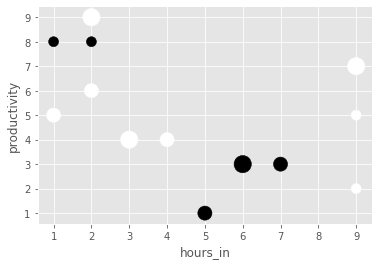

In [33]:
# 49.可视化指定4维DataFrame
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 100, c = df.caffienated)
# 图是二维的，happiness表示点的尺寸，然后caffienated表示颜色，所以思维数据展示在二维图上


In [ ]:
# 50.在同一个图中可视化2组数据，共用X轴，但y轴不同
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));
